In [ ]:
import numpy as np
import cv2

## Import image

In [ ]:
from PIL import Image
image_path_1 = '/content/image1.png'
image_path_2 = '/content/image2.jpg'
image = Image.open(image_path_1)
image2 = Image.open(image_path_2)


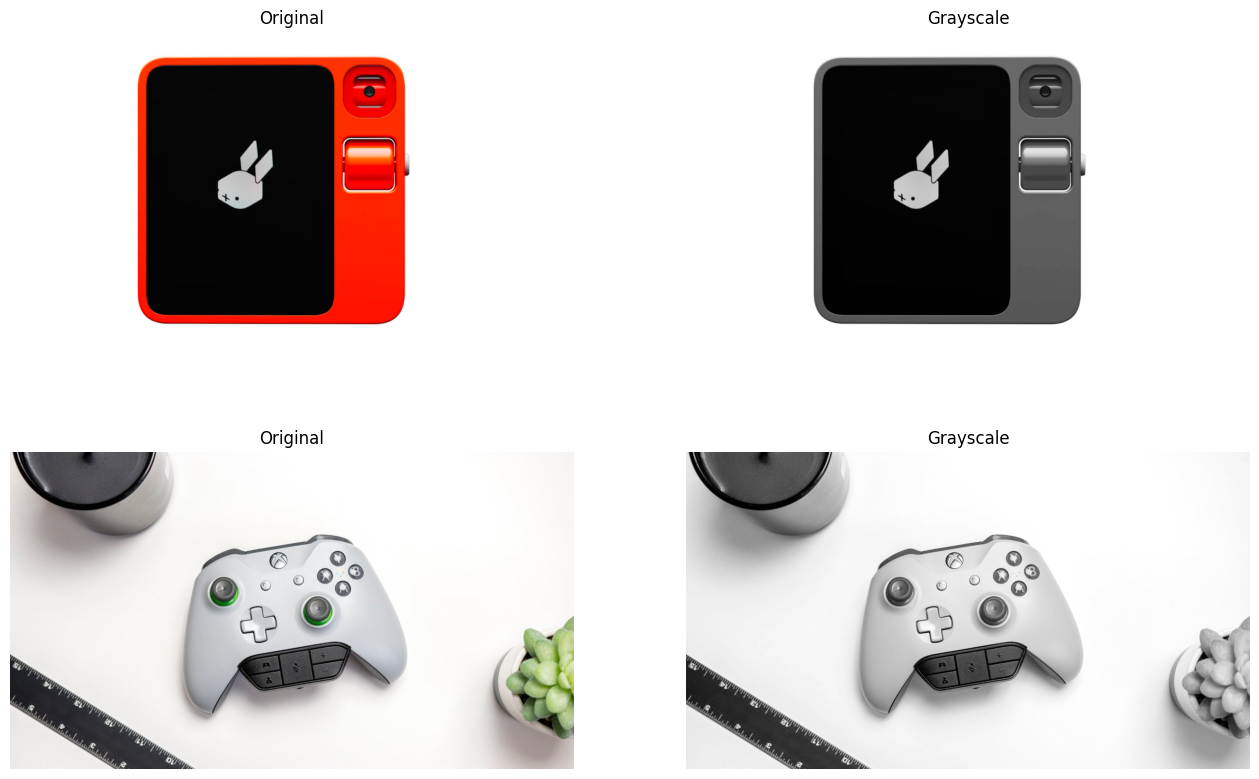

In [ ]:
import matplotlib.pyplot as plt
image_gray = image.convert('L')
image_gray2 = image2.convert('L')


plt.figure(figsize = (16, 10))
plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(image)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Grayscale')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Original')
plt.imshow(image2)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Grayscale')
plt.imshow(image_gray2, cmap='gray')
plt.axis('off')

plt.show()

## LoG for edge detection

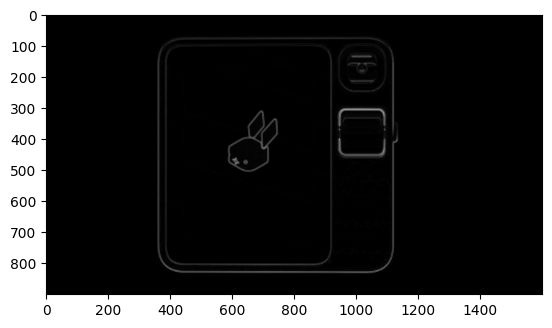

In [ ]:
# First we apply the gaussian filter
gaussian_image = cv2.GaussianBlur(np.array(image_gray), (5, 5), 0)

# Next we apply the laplacian filter
laplacian_image = cv2.Laplacian(gaussian_image, cv2.CV_64F)
laplacian_image = np.uint8(np.absolute(laplacian_image))

# The edges are detected
# We will now display the final image
plt.imshow(laplacian_image, cmap='gray')
plt.show()

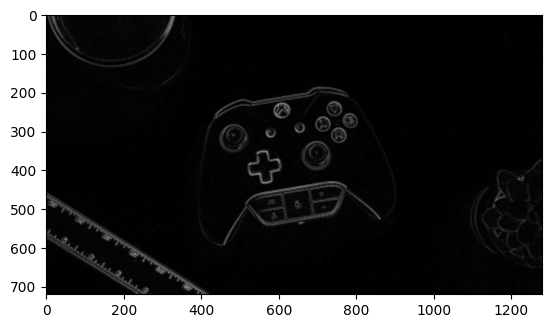

In [ ]:
# First we apply the gaussian filter
gaussian_image2 = cv2.GaussianBlur(np.array(image_gray2), (5, 5), 0)

# Next we apply the laplacian filter
laplacian_image2 = cv2.Laplacian(gaussian_image2, cv2.CV_64F)
laplacian_image2 = np.uint8(np.absolute(laplacian_image2))

# The edges are detected
# We will now display the final image
plt.imshow(laplacian_image2, cmap='gray')
plt.show()

## Canny Detector for edge detection

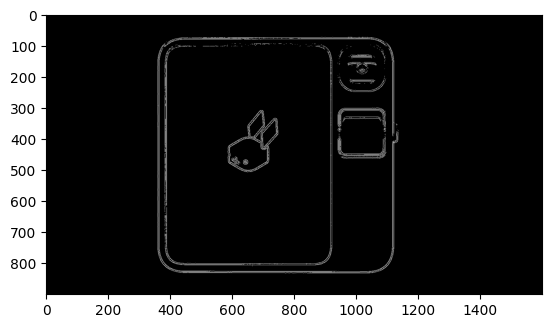

In [ ]:
# first we import canny edge detector from opencv
from cv2 import Canny

# next, we apply the canny edge detector on the image
canny_image = Canny(np.array(laplacian_image), 30, 30)

# the edges are noww detected
# finally, we display the image
plt.imshow(canny_image, cmap='gray')
plt.show()

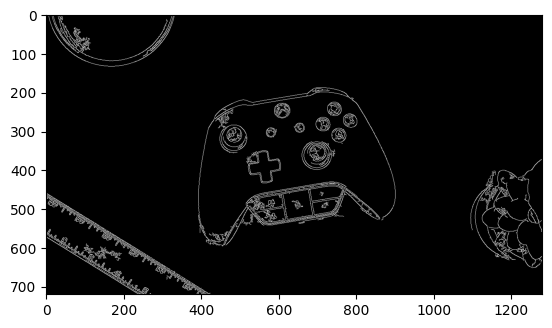

In [ ]:
# first we import canny edge detector from opencv
from cv2 import Canny

# next, we apply the canny edge detector on the image
canny_image2 = Canny(np.array(image2), 0, 300)

# the edges are noww detected
# finally, we display the image
plt.imshow(canny_image2, cmap='gray')
plt.show()

## Apply DFT to image

In [ ]:
# we apply dft to the image detected using canny detector
dft_image = cv2.dft(np.float32(canny_image),
                    flags=cv2.DFT_COMPLEX_OUTPUT
                    )

# next we apply a suitable filter to the image to enchance the edges of the image and supress the noise
# we will use a low pass filter to do this
filter = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

# we apply the filter to the image
filtered_image = cv2.filter2D(dft_image, -1, filter)

In [ ]:
# we apply dft to the image detected using canny detector
dft_image2 = cv2.dft(np.float32(canny_image2),
                    flags=cv2.DFT_COMPLEX_OUTPUT
                    )

# we apply the filter to the image
filtered_image2 = cv2.filter2D(dft_image2, -1, filter)

filtered_image2.shape

(720, 1280, 2)

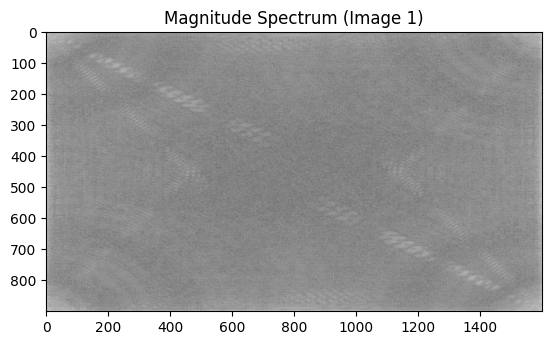

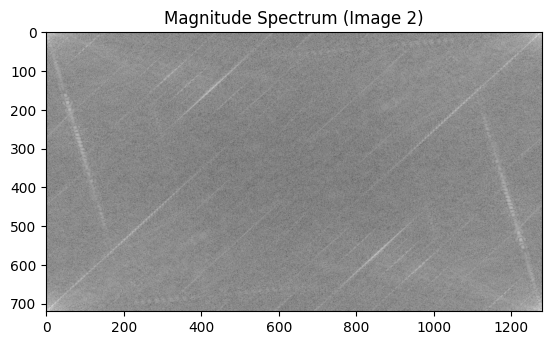

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_image[:, :, 0], dft_image[:, :, 1]))

# Display the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (Image 1)')
plt.show()

# Calculate the magnitude spectrum for the second image
magnitude_spectrum2 = 20 * np.log(cv2.magnitude(dft_image2[:, :, 0], dft_image2[:, :, 1]))

# Display the magnitude spectrum for the second image
plt.imshow(magnitude_spectrum2, cmap='gray')
plt.title('Magnitude Spectrum (Image 2)')
plt.show()
